## Political Speech NLP

Given that fmr. Presidents Barack Obama and Donald Trump has had plenty of speech over the course of their tenure. Apart from taking every speech at face value, it would be interesting to see if there was a possible method to quantify the differences between their speeches.

As such, this project will attempt to utilize Natural Language Processing (NLP) techniques and text mining in an attempt to identify any difference between their speeches. 

State of the Union speeches between 2010 to 2020 will be used for the purposes of this project. They are speeches that presidents would give at the start of each calendar year to propose legislative agenda and national priorities. 

### 1. Data Collection

Given that the number of speeches were not overly plenty, google search for each year's State of the Union speech was done and extracted individually into a txt file. In total, there would be 10 speeches. 

### 2. Importing Libraries

In [109]:
import pandas as pd
import glob
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

First step would be to read the text files and subsequently organize them into a dataframe.

### 3. Preprocessing

In [18]:
# storing each speech with their respective details into a data frame

speech, name, year, filename = [], [], [], []

# appending each list
for file in glob.glob('allspeeches/*.txt'): 
    filename.append(file[-13:]) # file name of each speech
    name.append(file[12:17]) # speaker for each speech
    year.append(file[17:21]) # year of each speech
    with open(file, 'r') as f:
        speech.append(f.read().strip()) # speech


In [34]:
# storing each list as a dictionary 
speech_dict = {'filename': filename, 'name': name, 'year': year, 'speech': speech}

# creating a dataframe from the dict
speech_df = (
    pd
    .DataFrame(data=speech_dict)
    .sort_values(by='year', ignore_index=True)
)

# exporting df into csv file
speech_df.to_excel('speech.xlsx')

speech_df

,filename,name,year,speech
0,obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o..."
1,obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co..."
2,obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of Co..."
3,obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co..."
4,obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co..."
5,obama2015.txt,obama,2015,"Mr. Speaker, Mr. Vice President, Members of Co..."
6,obama2016.txt,obama,2016,"Mr. Speaker, Mr. Vice President, Members of Co..."
7,trump2018.txt,trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co..."
8,trump2019.txt,trump,2019,"Madam Speaker, Mr. Vice President, Members of ..."
9,trump2020.txt,trump,2020,Thank you very much. Thank you. Thank you ve...


### 4. Feature Engineering

Next step involves obtaining an understanding of the data:
1. Number of characters
2. Number of sentences
3. Average number of characters
4. Readibility scores

#### 4.1. Length of strings in each speech

In [39]:
speech_df = speech_df.assign(len_speech = lambda x : x.speech.str.len())

speech_df

,filename,name,year,speech,len_speech
0,obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o...",43698
1,obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023
2,obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of Co...",42203
3,obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41201
4,obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009
5,obama2015.txt,obama,2015,"Mr. Speaker, Mr. Vice President, Members of Co...",40268
6,obama2016.txt,obama,2016,"Mr. Speaker, Mr. Vice President, Members of Co...",31167
7,trump2018.txt,trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co...",30457
8,trump2019.txt,trump,2019,"Madam Speaker, Mr. Vice President, Members of ...",30945
9,trump2020.txt,trump,2020,Thank you very much. Thank you. Thank you ve...,39648


#### 4.2. Replacing punctuation marks (?, !) into "." for easier splits

In [49]:
speech_df['speech'] = speech_df['speech'].str.replace('[!\?]', '.', regex=True)

speech_df

,filename,name,year,speech,len_speech
0,obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o...",43698
1,obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023
2,obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of Co...",42203
3,obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41201
4,obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009
5,obama2015.txt,obama,2015,"Mr. Speaker, Mr. Vice President, Members of Co...",40268
6,obama2016.txt,obama,2016,"Mr. Speaker, Mr. Vice President, Members of Co...",31167
7,trump2018.txt,trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co...",30457
8,trump2019.txt,trump,2019,"Madam Speaker, Mr. Vice President, Members of ...",30945
9,trump2020.txt,trump,2020,Thank you very much. Thank you. Thank you ve...,39648


After replacing punctuations in the speech, we can double check to make sure they have all been replaced. The .find() function returns -1 if none of the following string is found. 

In [47]:
speech_df['speech'].str.find('[!\?]')

0   -1
1   -1
2   -1
3   -1
4   -1
5   -1
6   -1
7   -1
8   -1
9   -1
Name: speech, dtype: int64

#### 4.3. Getting speech characteristics

In [57]:
speech_df = (
    speech_df
    .assign(sentences=lambda x: x.speech.str[0:-1].str.split('.').tolist(),
            num_sentences=lambda x: x.sentences.str.len(),
            avg_sen_length= lambda x: x.len_speech/x.num_sentences)
)

speech_df

,filename,name,year,speech,len_speech,sentences,num_sentences,avg_sen_length
0,obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"[Madam Speaker, Vice President Biden, members ...",562,77.754448
1,obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"[Mr, Speaker, Mr, Vice President, members of...",500,82.046000
2,obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of Co...",42203,"[Mr, Speaker, Mr, Vice President, members of...",518,81.472973
3,obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41201,"[Mr, Speaker, Mr, Vice President, members of...",455,90.551648
4,obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"[Mr, Speaker, Mr, Vice President, Members of...",351,113.985755
5,obama2015.txt,obama,2015,"Mr. Speaker, Mr. Vice President, Members of Co...",40268,"[Mr, Speaker, Mr, Vice President, Members of...",466,86.412017
6,obama2016.txt,obama,2016,"Mr. Speaker, Mr. Vice President, Members of Co...",31167,"[Mr, Speaker, Mr, Vice President, Members of...",304,102.523026
7,trump2018.txt,trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co...",30457,"[Mr, Speaker, Mr, Vice President, Members of...",322,94.586957
8,trump2019.txt,trump,2019,"Madam Speaker, Mr. Vice President, Members of ...",30945,"[Madam Speaker, Mr, Vice President, Members o...",297,104.191919
9,trump2020.txt,trump,2020,Thank you very much. Thank you. Thank you ve...,39648,"[Thank you very much, Thank you, Thank you...",557,71.181329


#### 4.4. Obtaining readability scores of each speech

Readability indicates how accessible the ideaas in each speeches are, and accessibility helps with connecting with the audience. Althought they are speeches, meaning they were pre-written beforehand, it would still be interesting to gain an insight into readability.


Two readability scores will be used to judge the speeches, they are:
1. [SMOG (click for article)](https://library.med.utah.edu/Patient_Ed/workshop/handouts/smog_formula.pdf)
2. [Flesch reading ease score (click for article)](https://en.wikipedia.org/wiki/Flesch–Kincaid_readability_tests)

In [60]:
import readability

In [85]:
test = speech_df['speech']

results = readability.getmeasures(test, lang='en')

results

OrderedDict([('readability grades',
              OrderedDict([('Kincaid', 2560.3211327056097),
                           ('ARI', 3281.8008442270775),
                           ('Coleman-Liau', 11.073277455998419),
                           ('FleschReadingEase', -6571.055171770728),
                           ('GunningFogIndex', 2629.65960081665),
                           ('LIX', 6585.705512386872),
                           ('SMOGIndex', 148.4819576442385),
                           ('RIX', 1464.0),
                           ('DaleChallIndex', 333.9597116244629)])),
             ('sentence info',
              OrderedDict([('characters_per_word', 4.5713045068104945),
                           ('syll_per_word', 1.3716214157296522),
                           ('words_per_sentence', 6563.4),
                           ('sentences_per_paragraph', 10.0),
                           ('type_token_ratio', 0.10127373007892251),
                           ('characters', 300033),
       

In [76]:
# getting SMOGIndex and FleschReadingEase for each speech
SMOGIndex, flesch = [], []

for i in speech_df['speech']:
    SMOGIndex.append(readability.getmeasures(i, lang='en')['readability grades']['SMOGIndex'])
    flesch.append(readability.getmeasures(i, lang='en')['readability grades']['FleschReadingEase'])
    
flesch

[24.720575267901523,
 32.322806083320536,
 26.228014157842694,
 52.06242707744663,
 9.227648912106872,
 56.19437746425349,
 25.06250899911781,
 51.03448989662204,
 44.106259681903715,
 33.439535910467704]

In [98]:
# inserting measures into dataframe
speech_df = speech_df.assign(SMOGIndex=SMOGIndex, flesch=flesch)

speech_df

,filename,name,year,speech,len_speech,sentences,num_sentences,avg_sen_length,SMOGIndex,flesch
0,obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"[Madam Speaker, Vice President Biden, members ...",562,77.754448,17.826429,24.720575
1,obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"[Mr, Speaker, Mr, Vice President, members of...",500,82.046000,16.543303,32.322806
2,obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of Co...",42203,"[Mr, Speaker, Mr, Vice President, members of...",518,81.472973,17.344065,26.228014
3,obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41201,"[Mr, Speaker, Mr, Vice President, members of...",455,90.551648,14.187551,52.062427
4,obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"[Mr, Speaker, Mr, Vice President, Members of...",351,113.985755,19.064501,9.227649
5,obama2015.txt,obama,2015,"Mr. Speaker, Mr. Vice President, Members of Co...",40268,"[Mr, Speaker, Mr, Vice President, Members of...",466,86.412017,13.518314,56.194377
6,obama2016.txt,obama,2016,"Mr. Speaker, Mr. Vice President, Members of Co...",31167,"[Mr, Speaker, Mr, Vice President, Members of...",304,102.523026,17.441406,25.062509
7,trump2018.txt,trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co...",30457,"[Mr, Speaker, Mr, Vice President, Members of...",322,94.586957,13.843611,51.034490
8,trump2019.txt,trump,2019,"Madam Speaker, Mr. Vice President, Members of ...",30945,"[Madam Speaker, Mr, Vice President, Members o...",297,104.191919,14.799100,44.106260
9,trump2020.txt,trump,2020,Thank you very much. Thank you. Thank you ve...,39648,"[Thank you very much, Thank you, Thank you...",557,71.181329,16.381695,33.439536


### 5. Data Visualization

In [83]:
# plot style
plt.style.use('ggplot')

# plot title size
plt.rc('axes', titlesize=18)

# plot font size
plt.rc('font', size=13)

# plot figure size
matplotlib.rcParams['figure.figsize'] = (18, 9)

#### 5.1. Length of speech by President

<AxesSubplot:xlabel='name', ylabel='len_speech'>

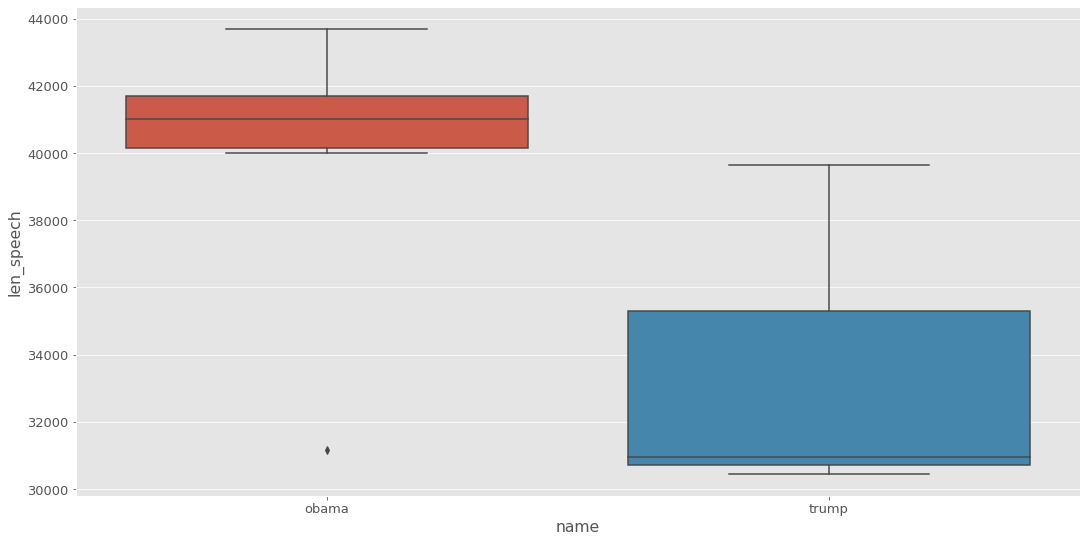

In [84]:
sns.boxplot(data=speech_df, x='name', y='len_speech')

#### 5.2. Number of sentence by President

<AxesSubplot:xlabel='name', ylabel='num_sentences'>

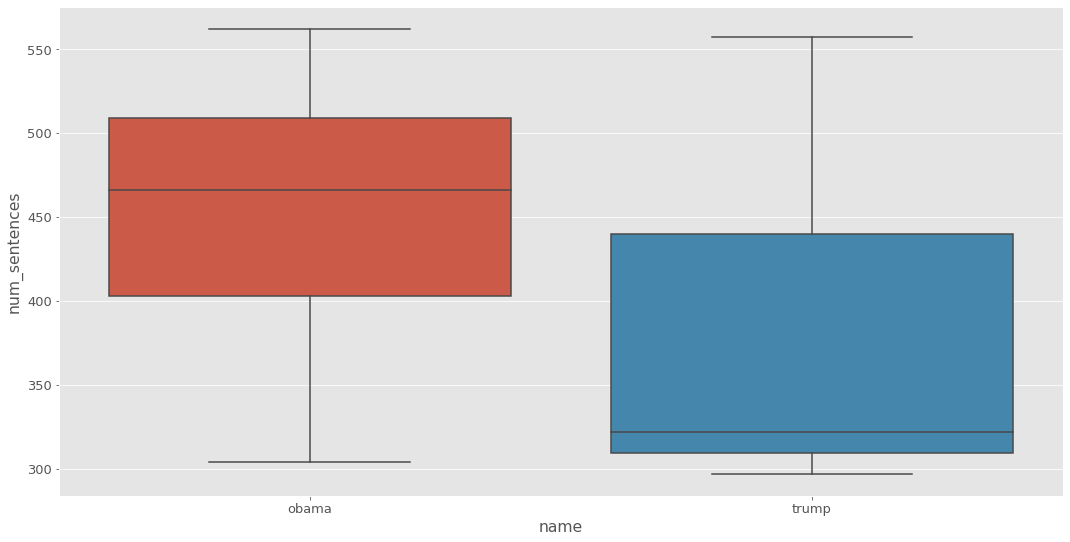

In [86]:
sns.boxplot(data=speech_df, x='name', y='num_sentences')

So far, President Trump's speeches has been shorter plus fewer sentences. However, that may not be the entire story. We can look at the average sentence length to have a better understanding.

#### 5.3. Average length sentence by President

<AxesSubplot:xlabel='name', ylabel='avg_sen_length'>

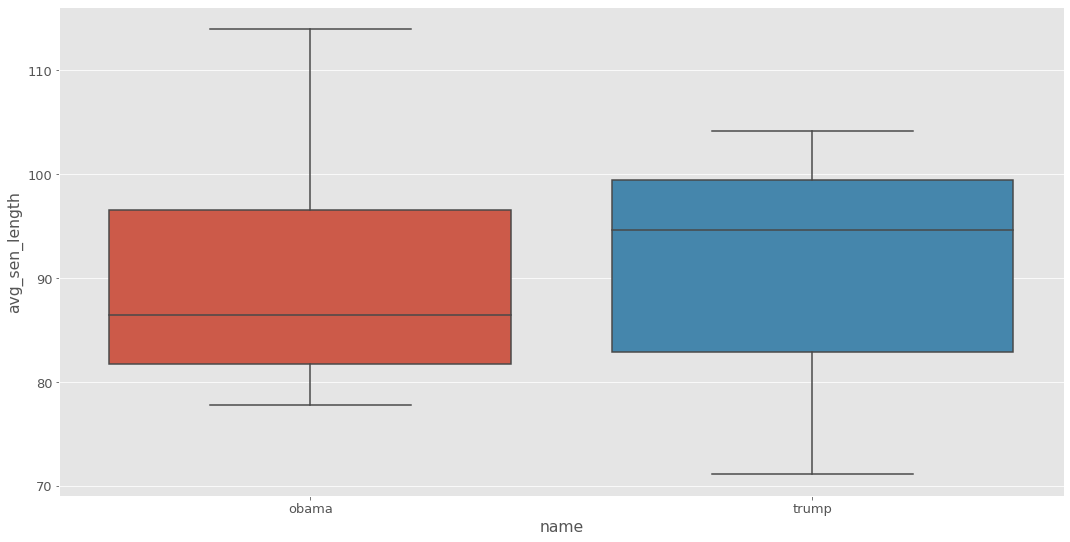

In [89]:
sns.boxplot(data=speech_df, x='name', y='avg_sen_length')

In [99]:
print(f"Obama's avg sentence length: {speech_df[speech_df['name']=='obama']['avg_sen_length'].mean()}")

print(f"Trump's avg sentence length: {speech_df[speech_df['name']=='trump']['avg_sen_length'].mean()}")

Obama's avg sentence length: 90.67798117030347
Trump's avg sentence length: 89.98673475314644


#### 5.4. SMOG Index by President

<AxesSubplot:xlabel='name', ylabel='SMOGIndex'>

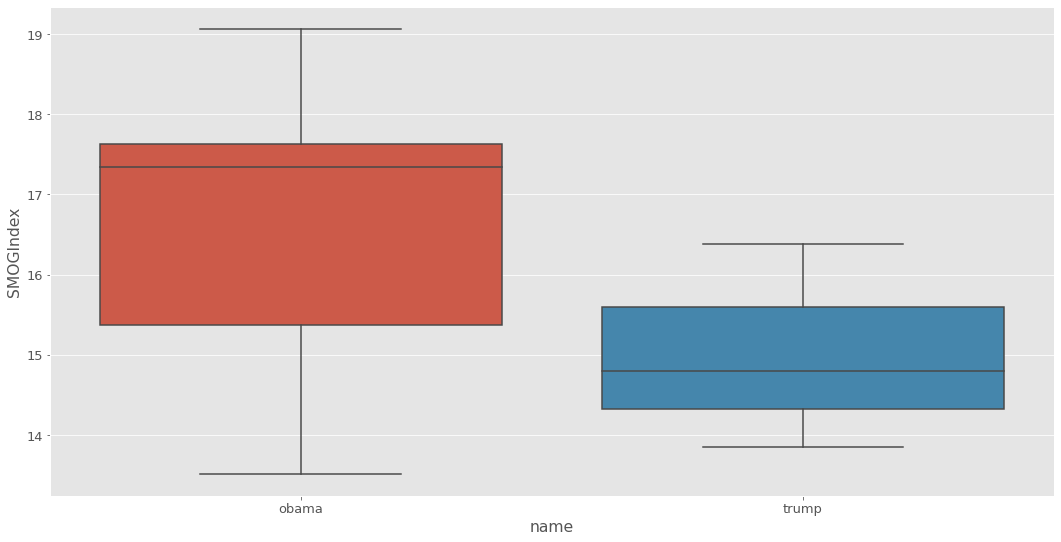

In [101]:
sns.boxplot(data=speech_df, x='name', y='SMOGIndex')

#### 5.5. Flesch Score by President

<AxesSubplot:xlabel='name', ylabel='flesch'>

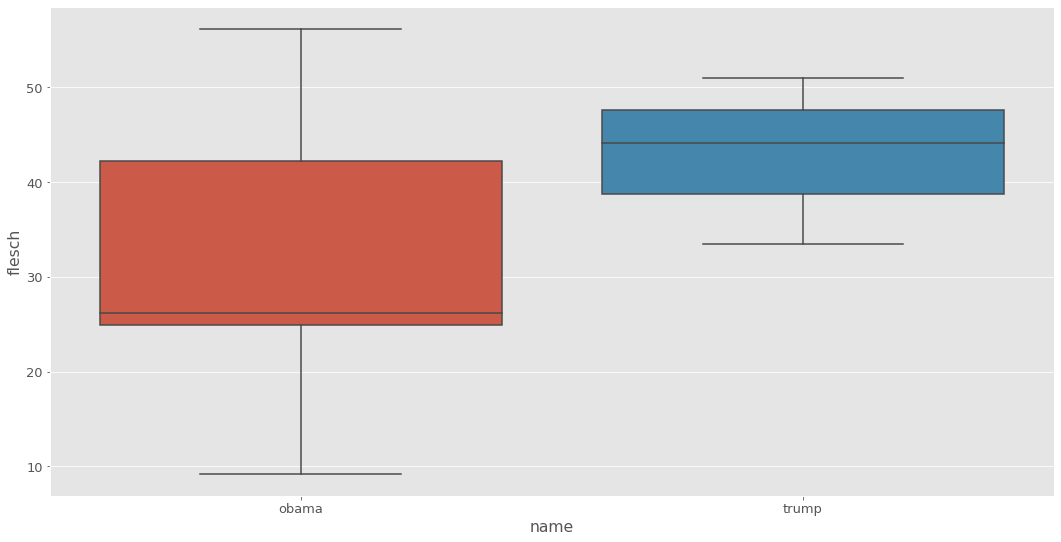

In [102]:
sns.boxplot(data=speech_df, x='name', y='flesch')

Note, the higher the SMOGIndex score, the harder it is to read the speech. Conversely, for flesch score, the lower it is, the harder it is to read.

To summarize, it is harder to read President Obama's speeches whereas President Trump's speeches were generally easier to read.

### 6. SpaCy - PoS Tagging

In [114]:
import en_core_web_sm

In [116]:
# loading pre-trained model 
nlp = en_core_web_sm.load()

In [119]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.pos_)

PROPN
AUX
VERB
ADP
VERB
PROPN
NOUN
ADP
SYM
NUM
NUM


In [143]:
# Wrapping obama's 2010 speech into a list for SpaCy's POS tagging

# speech_df.loc[speech_df['year'] == '2010', 'speech']
speech_2010 = speech_df[speech_df['year'] == '2010']['speech']



for token in nlp(str(speech_2010)):
    lst_2010.append(token.pos_)

from collections import Counter

Counter(lst_2010)

Counter({'PUNCT': 7, 'SPACE': 2, 'PROPN': 5, 'NOUN': 5, 'X': 1})

In [184]:
test_lst = []

for token in nlp(str(speech_df.query('year == "2010"')['speech'].to_list())):
    test_lst.append(token.pos_)
    
Counter(test_lst)

Counter({'PUNCT': 1221,
         'PROPN': 412,
         'NOUN': 1588,
         'ADP': 689,
         'ADJ': 539,
         'CCONJ': 298,
         'DET': 949,
         'VERB': 1139,
         'SCONJ': 163,
         'NUM': 106,
         'AUX': 327,
         'ADV': 378,
         'PART': 285,
         'PRON': 450,
         'X': 8,
         'INTJ': 23,
         'SYM': 12})

In [189]:
out = [[] for val in range(0, len(speech_df['speech'].to_list()))]



M
M
M
M
M
M
M
M
M
T


In [171]:
len(speech_df['speech'].to_list())

10

In [195]:
out = [[] for val in range(0, len(speech_df['speech'].to_list()))]
test_lst = []

for i in speech_df['speech'].to_list():
    for token in nlp(str(i)):    
        out.append(token.pos_)
    
Counter(out)

IndentationError: expected an indented block (<ipython-input-195-cc67f754f6b0>, line 6)

In [196]:
for i in speech_df['speech'].to_list():
    [out.append(token.pos_) for token in nlp(str(i))]

Counter(out)

TypeError: unhashable type: 'list'